Handwritten MNIST Recognition using ANNs

In [4]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [5]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 2s 0us/step
x_train.shape: (60000, 28, 28)


In [6]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2887 - accuracy: 0.9169 - val_loss: 0.1375 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1411 - accuracy: 0.9576 - val_loss: 0.1015 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1076 - accuracy: 0.9667 - val_loss: 0.0889 - val_accuracy: 0.9721
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0884 - accuracy: 0.9729 - val_loss: 0.0803 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 0.0766 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9795 - val_loss: 0.0772 - val_accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0571 - accuracy: 0.9816 - val_loss: 0.0721 - val_accuracy:

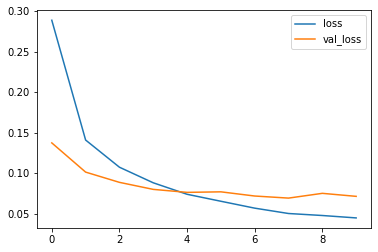

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

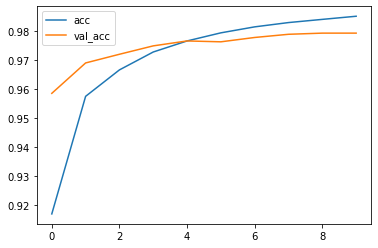

In [10]:
# Plotting accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 0.9794
[0.07165954262018204, 0.9793999791145325]


Confusion matrix, without normalization
[[ 970    1    1    0    0    1    3    1    2    1]
 [   0 1123    3    1    0    0    2    1    5    0]
 [   3    1 1008    4    2    0    3    5    6    0]
 [   1    0    1  994    0    4    0    4    3    3]
 [   1    0    2    0  969    0    4    2    1    3]
 [   3    0    2   12    2  863    2    2    5    1]
 [   4    2    1    1    5    2  942    0    1    0]
 [   1    5    8    4    1    0    0 1003    1    5]
 [   7    0    2    1    4    4    4    3  945    4]
 [   3    2    0    7   11    2    0    4    3  977]]


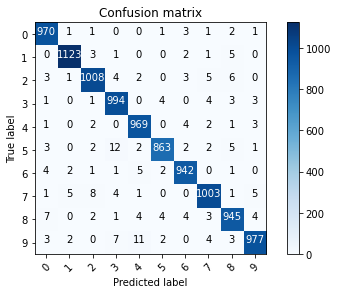

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 8 Predicted: 0')

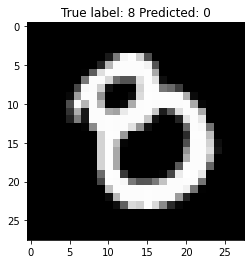

In [13]:
# Showing some misclassified examples, we get...
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))